In [158]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import optuna

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,matthews_corrcoef, precision_recall_curve,roc_auc_score




In [159]:
with open("optim_param/optim_DNN_1_params.json", "r") as f:
    DNN_1_params = json.load(f)

with open("optim_param/optim_DNN_2_params.json", "r") as f:
    DNN_2_params = json.load(f)

with open("optim_param/optim_DNN_3_params.json", "r") as f:
    DNN_3_params = json.load(f)

with open("optim_param/optim_DNN_4_params.json", "r") as f:
    DNN_4_params = json.load(f)

with open("optim_param/optim_DNN_5_params.json", "r") as f:
    DNN_5_params = json.load(f)

with open("optim_param/optim_DNN_6_params.json", "r") as f:
    DNN_6_params = json.load(f)

with open("optim_param/optim_DNN_7_params.json", "r") as f:
    DNN_7_params = json.load(f)

with open("optim_param/optim_ResNet_params.json", "r") as f:
    ResNet_params = json.load(f)

with open("optim_param/optim_FTTansformer_params.json", "r") as f:
    FTTransformer_params = json.load(f)

In [ ]:
class DNN_1(nn.Module):
    def __init__(self, input_dim, dropout=DNN_1_params["dropout"]):
        super(DNN_1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.layer2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.layer3 = nn.Linear(32, 16)
        self.bn3 = nn.BatchNorm1d(16)
        self.layer4 = nn.Linear(16, 8)
        self.bn4 = nn.BatchNorm1d(8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))  
        x = self.dropout(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn3(self.layer3(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn4(self.layer4(x))) 
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [161]:
class DNN_2(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_2_params["dropout1"],dropout2=DNN_2_params["dropout2"],dropout3=DNN_2_params["dropout3"],dropout4=DNN_2_params["dropout4"]):
        super(DNN_2, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32,16)
        self.layer4 = nn.Linear(16,8)
        self.output_layer = nn.Linear(8, 1)

        self.bn1=nn.BatchNorm1d(64)
        self.bn2=nn.BatchNorm1d(32)
        self.bn3=nn.BatchNorm1d(16)
        self.bn4=nn.BatchNorm1d(8)


        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [162]:
class DNN_3(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_3_params["dropout1"],dropout2=DNN_3_params["dropout2"]):
        super(DNN_3, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.bn1=nn.BatchNorm1d(64)
        self.bn2=nn.BatchNorm1d(32)
        self.bn3=nn.BatchNorm1d(16)
        self.bn4=nn.BatchNorm1d(8)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
    

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [163]:
class DNN_4(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_4_params["dropout1"],dropout2=DNN_4_params["dropout2"]):
        super(DNN_4, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.bn1=nn.BatchNorm1d(64)
        self.bn2=nn.BatchNorm1d(32)
        self.bn3=nn.BatchNorm1d(16)
        self.bn4=nn.BatchNorm1d(8)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [164]:
class DNN_5(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_5_params["dropout1"],dropout2=DNN_5_params["dropout2"]):
        super(DNN_5, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.bn1=nn.BatchNorm1d(64)
        self.bn2=nn.BatchNorm1d(32)
        self.bn3=nn.BatchNorm1d(16)
        self.bn4=nn.BatchNorm1d(8)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [165]:
class DNN_6(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_6_params["dropout1"],dropout2=DNN_6_params["dropout2"]):
        super(DNN_6, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.bn1=nn.BatchNorm1d(64)
        self.bn2=nn.BatchNorm1d(32)
        self.bn3=nn.BatchNorm1d(16)
        self.bn4=nn.BatchNorm1d(8)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [166]:
class DNN_7(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_7_params["dropout1"],dropout2=DNN_7_params["dropout2"]):
        super(DNN_7, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.bn1=nn.BatchNorm1d(64)
        self.bn2=nn.BatchNorm1d(32)
        self.bn3=nn.BatchNorm1d(16)
        self.bn4=nn.BatchNorm1d(8)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [167]:
class FTTransformer(nn.Module):
    def __init__(self, input_dim, num_classes=1, embed_dim=FTTransformer_params["embed_dim"], num_heads=FTTransformer_params["num_heads"], num_layers=FTTransformer_params["num_layers"], dropout=FTTransformer_params["dropout"]):
        super(FTTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.embedding_dropout = nn.Dropout(dropout)  # 埋め込み層後のDropout
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)
        self.output_dropout = nn.Dropout(dropout)  # 出力層前のDropout

    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)  # Dropoutを埋め込み層後に適用
        x = x.unsqueeze(1)  # [batch_size, 1, embed_dim]
        x = self.transformer(x)
        x = x.mean(dim=1)  # 平均プーリング
        x = self.output_dropout(x)  # Dropoutを適用
        x = self.fc(x)
        x = torch.sigmoid(x)  # 2値分類用のシグモイド活性化
        return x


In [168]:
class ResidualBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim,dropout1,dropout2):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.dropout1=nn.Dropout(dropout1)
        
        self.fc2 = nn.Linear(hidden_dim, input_dim)
        self.bn2 = nn.BatchNorm1d(input_dim)
        self.dropout2=nn.Dropout(dropout2)

    def forward(self, x):
        residual = x  # 入力を保存 (ショートカット)
        out = torch.relu(self.bn1(self.fc1(x)))
        out=self.dropout1(out)

        out = self.bn2(self.fc2(out))
        out=self.dropout2(out)

        out += residual  # ショートカット接続
        return torch.relu(out)


In [169]:
class ResNetBinaryClassifier(nn.Module):
    def __init__(self, input_dim, num_blocks=ResNet_params["num_blocks"], hidden_dim=ResNet_params["hidden_dim"], dropout1=ResNet_params["dropout1"], dropout2=ResNet_params["dropout2"]):
        super(ResNetBinaryClassifier, self).__init__()
        self.blocks = nn.Sequential(
            *[ResidualBlock(input_dim, hidden_dim, dropout1, dropout2) for _ in range(num_blocks)]
        )
        self.output_layer = nn.Linear(input_dim, 1)  # 出力層

    def forward(self, x):
        x = self.blocks(x)
        x = torch.sigmoid(self.output_layer(x))  # 2値分類用シグモイド
        return x

In [170]:
df=pd.read_csv('learning_data.csv',index_col=0)

X=df.drop(columns='dengue',axis=1).values
y=df['dengue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_test_tensor=torch.tensor(X_test, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test, dtype=torch.float32)

In [171]:
# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_paths = [
    "model_params/DNN_1.pth",
    "model_params/DNN_2.pth",
    "model_params/DNN_3.pth",
    "model_params/DNN_4.pth",
    "model_params/DNN_5.pth",
    "model_params/DNN_6.pth",
    "model_params/DNN_7.pth",
    "model_params/FTTransformer.pth",
    "model_params/ResNet.pth",
    ]

model_classes = {0: DNN_1,
                 1: DNN_2,
                 2: DNN_3,
                 3: DNN_4,
                 4: DNN_5,
                 5: DNN_6,
                 6: DNN_7,
                 7:FTTransformer,
                 8:ResNetBinaryClassifier
                 }

models=[]

for i, path in enumerate(model_paths):
    if i in model_classes:
        model = model_classes[i](input_dim=X_train.shape[1]).to(device)
        model.load_state_dict(torch.load(path, map_location=device))
        model.eval()
        models.append(model)

/tmp/ipykernel_1287795/1801429464.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))
/home/gonken/anaconda3/en

In [172]:
train_outputs = []
test_outputs = []

with torch.no_grad():
    for model in models:
        model.eval()
        
        train_output = model(X_train_tensor.to(device))
        train_outputs.append(train_output)
        
        # テストデータの出力
        test_output = model(X_test_tensor.to(device))
        test_outputs.append(test_output)

train_DL_features = torch.cat(train_outputs, dim=1)  
test_DL_features = torch.cat(test_outputs, dim=1) 

# 出力形状の確認
print(f"Train DL Features Shape: {train_DL_features.shape}")
print(f"Test DL Features Shape: {test_DL_features.shape}")


Train DL Features Shape: torch.Size([3508, 9])
Test DL Features Shape: torch.Size([878, 9])


In [173]:
train_DL_features_np = train_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(train_DL_features_np.reshape(-1, train_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=6,random_state=42)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"train_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
train_standardized_features = scaler_standard.fit_transform(all_features)

print(f"train_standardized_features.shape: {train_standardized_features.shape}")

all_features.shape: (3508, 20)
train_DL_features_np.shape: (3508, 9)
train_standardized_features.shape: (3508, 20)


In [174]:
test_DL_features_np = test_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(test_DL_features_np.reshape(-1, test_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=6,random_state=42)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"test_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
test_standardized_features = scaler_standard.fit_transform(all_features)

print(f"test_standardized_features.shape: {test_standardized_features.shape}")

all_features.shape: (878, 20)
test_DL_features_np.shape: (3508, 9)
test_standardized_features.shape: (878, 20)


In [175]:
X_train, X_val, y_train, y_val = train_test_split(train_standardized_features, y_train, test_size=0.1,random_state=42)

In [176]:
X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_val_tensor=torch.tensor(X_val, dtype=torch.float32)
y_val_tensor=torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(test_standardized_features, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [177]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=128, shuffle=False)

In [178]:
class meta_model(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim, num_heads, num_layers, dropout):
        super(meta_model, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.embedding_dropout = nn.Dropout(dropout)  # 埋め込み層後のDropout
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)
        self.output_dropout = nn.Dropout(dropout)  # 出力層前のDropout

    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)  # Dropoutを埋め込み層後に適用
        x = x.unsqueeze(1)  # [batch_size, 1, embed_dim]
        x = self.transformer(x)
        x = x.mean(dim=1)  # 平均プーリング
        x = self.output_dropout(x)  # Dropoutを適用
        x = self.fc(x)
        x = torch.sigmoid(x)  # 2値分類用のシグモイド活性化
        return x


In [179]:
def objective(trial):
    # ハイパーパラメータのサンプリング
    embed_dim=trial.suggest_categorical("embed_dim",[64,128,256])
    num_heads=trial.suggest_categorical("num_heads",[4,8,16])
    num_layers=trial.suggest_categorical("num_layers",[3,4,5])
    dropout = trial.suggest_float("dropout", 0, 0.5, step=0.05)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)  
    weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)   

    # モデルの定義
    model = meta_model(
        input_dim=X_train_tensor.shape[1],
        num_classes=1,
        embed_dim=embed_dim,
        num_heads=num_heads,
        num_layers=num_layers,
        dropout=dropout
    ).to(device)

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Early Stoppingの設定
    patience = 10
    best_val_loss = float('inf')
    patience_counter = 0

    # 訓練ループ
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch.squeeze())
            loss.backward()
            optimizer.step()

        # バリデーション評価
        model.eval()
        val_loss = 0
        val_true, val_pred = [], []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss += criterion(val_outputs, y_val.squeeze()).item()
                predictions = (val_outputs >=0.5).float()
                val_true.extend(y_val.cpu().numpy())
                val_pred.extend(predictions.cpu().numpy())

        val_loss /= len(val_loader)

        # Early Stoppingの判定
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        # Optunaのプルーニング機能
        trial.report(val_loss, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    mcc = matthews_corrcoef(val_true, val_pred)
    print(f"Final MCC: {mcc:.4f}")

    return mcc  


In [180]:
device_id = 1
torch.cuda.set_device(device_id)
device = torch.device(f"cuda:{device_id}" if torch.cuda.is_available() else "cpu")

# Optunaの設定
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=100)

# 結果表示
print("Best Parameters: ", study.best_params)
print("Best Validation F1: ", study.best_value)

[I 2024-12-12 19:42:30,608] A new study created in memory with name: no-name-e4fb273e-dc40-4c10-9ce0-3b21f041e5f7
/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first fo

Early stopping at epoch 16
Final MCC: 0.2066


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:42:46,990] Trial 1 finished with value: 0.198053

Early stopping at epoch 15
Final MCC: 0.1981


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:42:55,512] Trial 2 finished with value: 0.207425

Early stopping at epoch 14
Final MCC: 0.2074


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:43:03,183] Trial 3 finished with value: 0.0 and 

Early stopping at epoch 11
Final MCC: 0.0000


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:43:09,853] Trial 4 finished with value: 0.0 and 

Early stopping at epoch 16
Final MCC: 0.0000


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:43:16,470] Trial 5 finished with value: 0.183878

Early stopping at epoch 11
Final MCC: 0.1839


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:43:22,950] Trial 6 finished with value: 0.182857

Early stopping at epoch 12
Final MCC: 0.1829


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:43:23,405] Trial 7 pruned. 
[I 2024-12-12 19:43:

Early stopping at epoch 17
Final MCC: 0.0000


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:43:31,669] Trial 9 pruned. 
[I 2024-12-12 19:43:

Early stopping at epoch 28
Final MCC: 0.1954


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:43:44,484] Trial 11 pruned. 
[I 2024-12-12 19:43

Early stopping at epoch 32
Final MCC: 0.2059


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:44:07,972] Trial 33 pruned. 
[I 2024-12-12 19:44

Early stopping at epoch 11
Final MCC: 0.2396


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:44:23,093] Trial 35 finished with value: 0.16824

Early stopping at epoch 24
Final MCC: 0.1682


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:44:29,410] Trial 36 finished with value: 0.25545

Early stopping at epoch 15
Final MCC: 0.2555


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:44:29,848] Trial 37 pruned. 
[I 2024-12-12 19:44

Early stopping at epoch 17
Final MCC: 0.2227


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:44:45,040] Trial 42 finished with value: 0.21195

Early stopping at epoch 13
Final MCC: 0.2120


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:44:45,462] Trial 43 pruned. 
[I 2024-12-12 19:44

Early stopping at epoch 14
Final MCC: 0.2077


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:44:53,921] Trial 47 pruned. 
[I 2024-12-12 19:45

Early stopping at epoch 18
Final MCC: 0.1972


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:45:12,561] Trial 49 finished with value: 0.20899

Early stopping at epoch 21
Final MCC: 0.2090


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:45:13,103] Trial 50 pruned. 
[I 2024-12-12 19:45

Early stopping at epoch 23
Final MCC: 0.2015


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:45:24,989] Trial 52 pruned. 
[I 2024-12-12 19:45

Early stopping at epoch 24
Final MCC: 0.1924


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:45:37,956] Trial 57 pruned. 
[I 2024-12-12 19:45

Early stopping at epoch 15
Final MCC: 0.2090


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:45:46,255] Trial 62 pruned. 
[I 2024-12-12 19:45

Early stopping at epoch 18
Final MCC: 0.2135


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:45:55,143] Trial 64 pruned. 
[I 2024-12-12 19:45

Early stopping at epoch 16
Final MCC: 0.1990


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:46:03,619] Trial 67 pruned. 
[I 2024-12-12 19:46

Early stopping at epoch 11
Final MCC: 0.2285


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:46:15,110] Trial 72 finished with value: 0.19393

Early stopping at epoch 11
Final MCC: 0.1939


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:46:15,641] Trial 73 pruned. 
[I 2024-12-12 19:46

Early stopping at epoch 19
Final MCC: 0.2360


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:46:25,170] Trial 78 pruned. 
[I 2024-12-12 19:46

Early stopping at epoch 14
Final MCC: 0.2321


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:46:32,807] Trial 82 pruned. 
[I 2024-12-12 19:46

Early stopping at epoch 11
Final MCC: 0.2158


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:46:38,458] Trial 85 pruned. 
[I 2024-12-12 19:46

Early stopping at epoch 11
Final MCC: 0.1522


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:46:44,773] Trial 88 pruned. 
[I 2024-12-12 19:46

Early stopping at epoch 23
Final MCC: 0.2074


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:46:57,567] Trial 94 pruned. 
[I 2024-12-12 19:47

Early stopping at epoch 12
Final MCC: 0.2364


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:47:10,231] Trial 96 finished with value: 0.23018

Early stopping at epoch 12
Final MCC: 0.2302


/tmp/ipykernel_1287795/2683590562.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1287795/2683590562.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-1)
/home/gonken/anaconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
[I 2024-12-12 19:47:10,799] Trial 97 pruned. 
[I 2024-12-12 19:47

Best Parameters:  {'embed_dim': 256, 'num_heads': 16, 'num_layers': 4, 'dropout': 0.5, 'learning_rate': 0.0007400257470594041, 'weight_decay': 0.021710065492330736}
Best Validation F1:  0.25545658049094966


In [181]:
best_params = study.best_params

# JSON形式で保存
with open("optim_param/stack_model_params.json", "w") as f:
    json.dump(best_params, f)

print("Best parameters saved to 'best_params.json'")

Best parameters saved to 'best_params.json'


Epoch [1/50], Loss: 0.5575
Epoch [1/50], Train Loss: 0.5575, Val Loss: 0.7665
Epoch [2/50], Loss: 0.4707
Epoch [2/50], Train Loss: 0.4707, Val Loss: 0.7522
Epoch [3/50], Loss: 0.4780
Epoch [3/50], Train Loss: 0.4780, Val Loss: 0.7483
Epoch [4/50], Loss: 0.4826
Epoch [4/50], Train Loss: 0.4826, Val Loss: 0.7881
Epoch [5/50], Loss: 0.4750
Epoch [5/50], Train Loss: 0.4750, Val Loss: 0.7800
Epoch [6/50], Loss: 0.4728
Epoch [6/50], Train Loss: 0.4728, Val Loss: 0.7424
Epoch [7/50], Loss: 0.4618
Epoch [7/50], Train Loss: 0.4618, Val Loss: 0.7907
Epoch [8/50], Loss: 0.4599
Epoch [8/50], Train Loss: 0.4599, Val Loss: 0.7563
Epoch [9/50], Loss: 0.4591
Epoch [9/50], Train Loss: 0.4591, Val Loss: 0.7990
Epoch [10/50], Loss: 0.4622
Epoch [10/50], Train Loss: 0.4622, Val Loss: 0.8323
Epoch [11/50], Loss: 0.4576
Epoch [11/50], Train Loss: 0.4576, Val Loss: 0.7878
Epoch [12/50], Loss: 0.4584
Epoch [12/50], Train Loss: 0.4584, Val Loss: 0.7951
Epoch [13/50], Loss: 0.4572
Epoch [13/50], Train Loss: 0.4

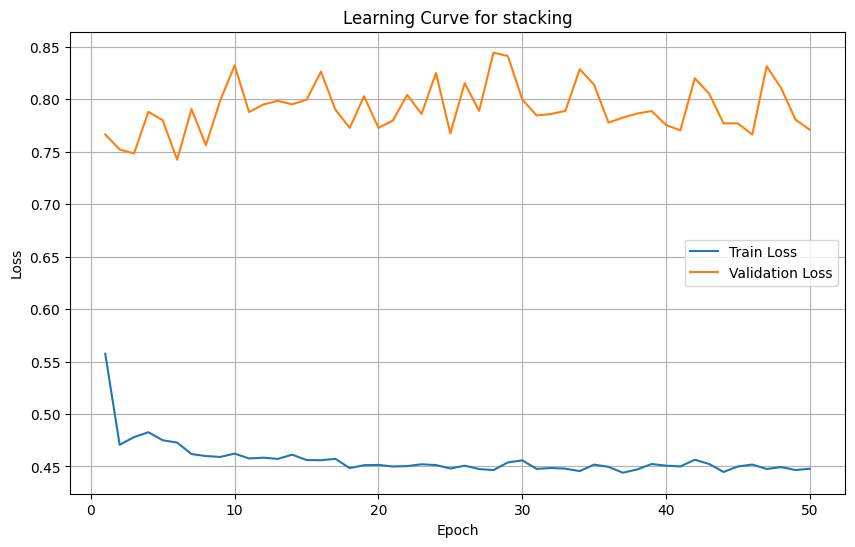

In [182]:
best_params=study.best_params
model = meta_model(input_dim=X_train_tensor.shape[1],embed_dim=best_params["embed_dim"],num_heads=best_params["num_heads"],num_layers=best_params["num_layers"],dropout=best_params['dropout'],num_classes=1).to(device)

# 最適化と訓練を実行
optimizer = optim.Adam(model.parameters(), lr=best_params["learning_rate"],weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

num_epochs=50
train_losses = []
val_losses = []

model.train()
for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch.squeeze())
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')

    if val_loader is not None:
        model.eval()  
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss = criterion(val_outputs, y_val.squeeze())
                epoch_val_loss += val_loss.item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        model.train()  

    if val_loader is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
if val_losses:
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for stacking')
plt.legend()
plt.grid()
plt.show()

Accuracy: 58.09%
Precision: 0.4619
Recall: 0.5192
F1 Score: 0.4889
Matthews Correlation Coefficient: 0.1364
Specificity: 0.6197


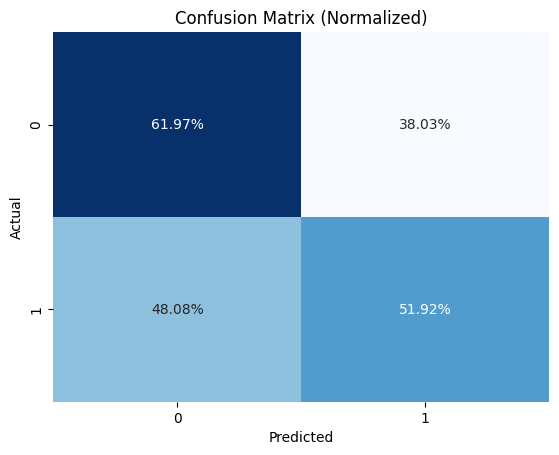

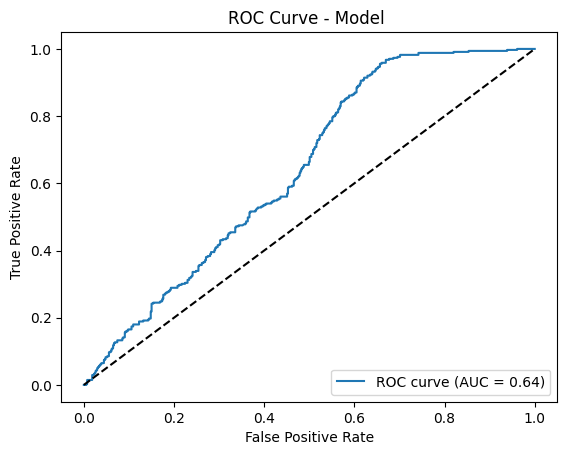

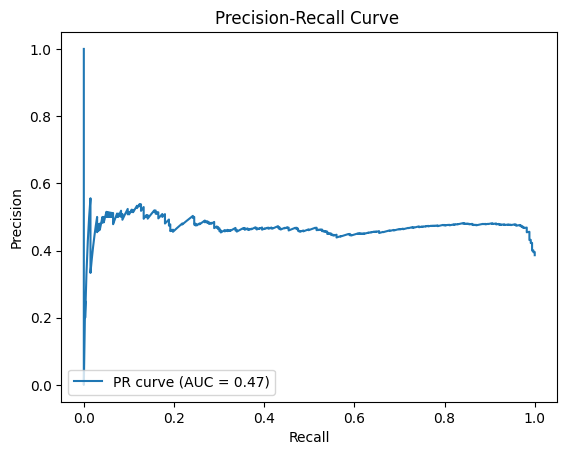

In [183]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    # 予測と確率
    test_outputs = model(X_test_tensor).squeeze()
    predictions = (test_outputs >=0.5).float()
    y_true = y_test_tensor.cpu().numpy()
    y_pred = predictions.cpu().numpy()
    y_prob = test_outputs.cpu().numpy()

# 評価指標
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)  
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Matthews Correlation Coefficient: {mcc:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # 混同行列（割合表示）
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Normalized)")
    plt.show()

    # ROC曲線とAUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model ')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall曲線
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ')
    plt.legend(loc="lower left")
    plt.show()    

In [184]:
torch.save(model.state_dict(), 'model_params/stack_model_FTT.pth')